In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [10]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0 # for information only
    
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return beta.rvs(self.a, self.b)
    
    def update(self, x):
        self.a = self.a + x
        self.b = self.b + 1 - x
        self.N += 1

In [3]:
help(beta)

Help on beta_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.beta_gen object>
    A beta continuous random variable.

    As an instance of the `rv_continuous` class, `beta` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(a, b, loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, a, b, loc=0, scale=1)
        Probability density function.
    logpdf(x, a, b, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, a, b, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, a, b, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, a, b, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, a, b, loc=0, scale=1)
        Log of the survival function

In [9]:
a = beta.rvs(1,1)
a

np.float64(0.833432323838351)

In [18]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}") #win rate #/# not a floating point, plot on one figure
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

In [11]:
np.linspace(0, 1, 3)

array([0. , 0.5, 1. ])

In [20]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

sample_points = [5,10,20,50,100,200,500,1000,1500,1999]

rewards = np.zeros(NUM_TRIALS)

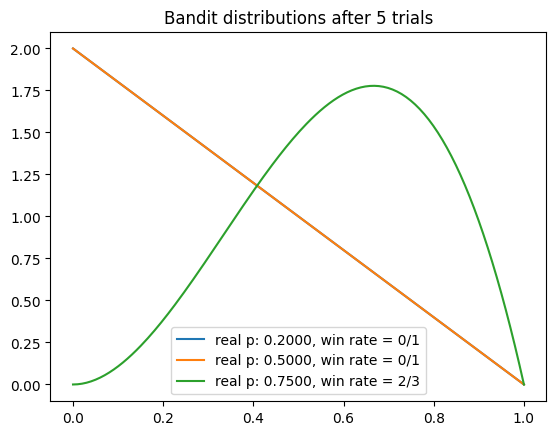

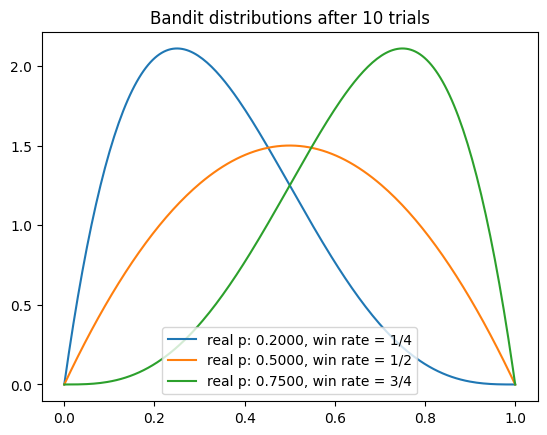

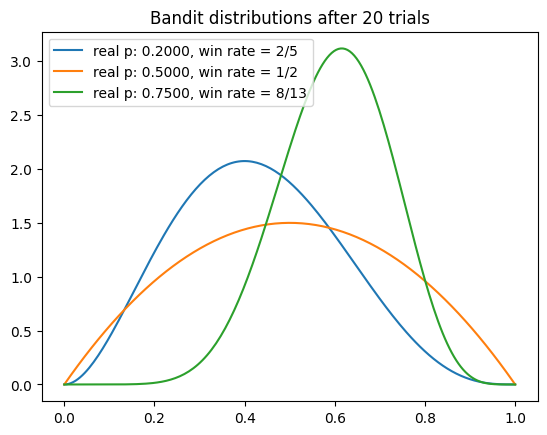

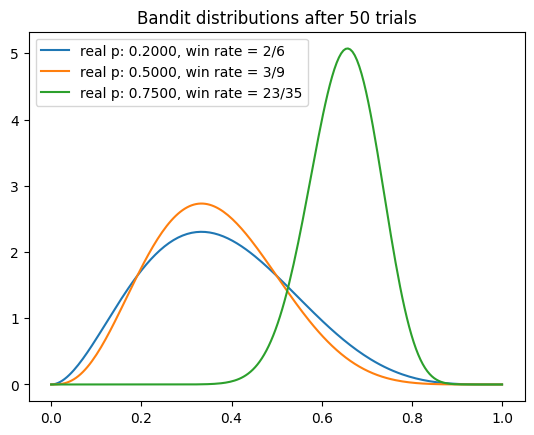

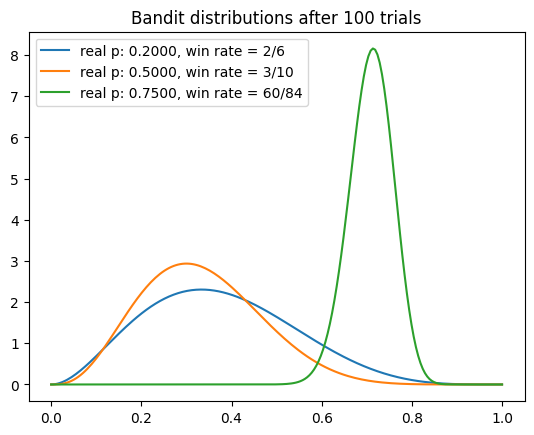

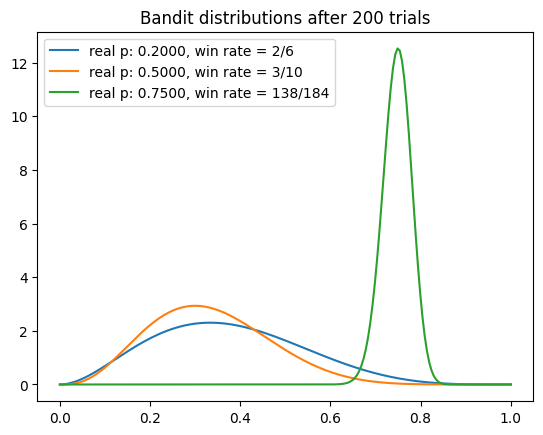

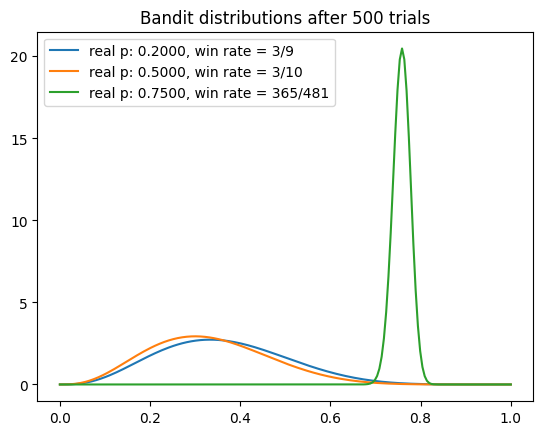

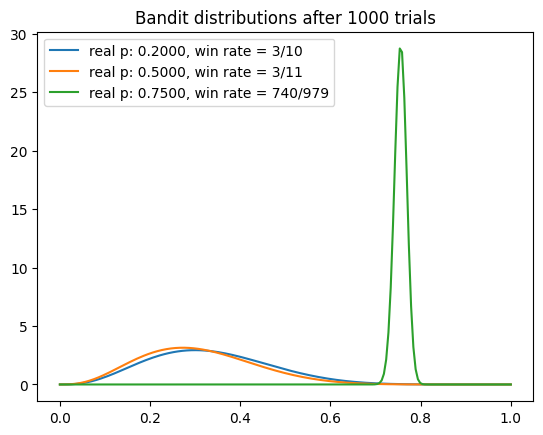

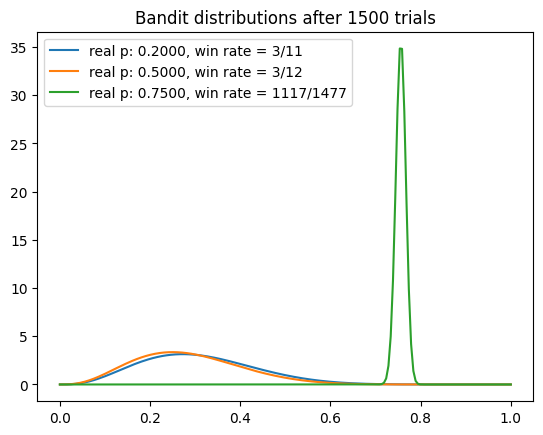

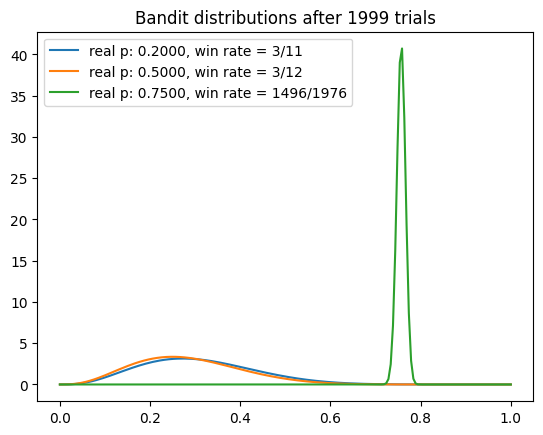

total reward earned: 1503.0
overall win rate: 0.7515
num times selected each bandit: [11, 12, 1977]


In [21]:
for i in range(NUM_TRIALS):
    # Thompson sampling
    j = np.argmax([b.sample() for b in bandits])

    # plot the posteriors
    if i in sample_points:
        plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num times selected each bandit:", [b.N for b in bandits])

In [25]:
help(np.random.beta)

Help on method beta in module numpy.random:

beta(a, b, size=None) method of numpy.random.mtrand.RandomState instance
    beta(a, b, size=None)

    Draw samples from a Beta distribution.

    The Beta distribution is a special case of the Dirichlet distribution,
    and is related to the Gamma distribution.  It has the probability
    distribution function

    .. math:: f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                     (1 - x)^{\beta - 1},

    where the normalization, B, is the beta function,

    .. math:: B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}
                                 (1 - t)^{\beta - 1} dt.

    It is often seen in Bayesian inference and order statistics.

    .. note::
        New code should use the `~numpy.random.Generator.beta`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.


    Parameters
    ----------
    a : float or array_like of floats

In [26]:
help(beta.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.beta_gen instance
    Random variates of given type.

    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional

        If `random_state` is None (or `np.random`), the
        `numpy.random.RandomState` singleton is used.
        If `random_state` is an int, a new ``RandomState`` instance is
        used, seeded with `random_state`.
        If `random_state` is already a ``Generator`

In [27]:
help(beta.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.beta_gen instance
    Probability density function at x of the given RV.

    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)

    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



In [30]:
print(beta.__doc__)

A beta continuous random variable.

As an instance of the `rv_continuous` class, `beta` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(a, b, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, a, b, loc=0, scale=1)
    Probability density function.
logpdf(x, a, b, loc=0, scale=1)
    Log of the probability density function.
cdf(x, a, b, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, a, b, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, a, b, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, a, b, loc=0, scale=1)
    Log of the survival function.
ppf(q, a, b, loc=0, scale=1)
    Percent point function (inverse of ``cdf`` --- percentiles).
isf(q, a, b, loc=0, scale=1)
    Inverse survival function (inverse of ``sf``).
moment(order,

In [37]:
a = beta(1,1)
print(a.__doc__)

None
